In [27]:
#@title Importations

import math
import matplotlib.pyplot as plt
from numbers import Number


In [ ]:
#@title TDA Graphe

class Graphe:

    # Graphe représenté par une matrice d'adjacence. On utilise un dictionnaire pour retrouver
    # l'indice d'un sommet
    def __init__(self, dirige=False, value=False):
        self._sommets = {}
        self._matrice = []
        self._dirige = dirige
        self._value = value
        if self._value:
            self._valeur_defaut = None
        else:
            self._valeur_defaut = False

    def get_sommets(self) -> list:
        return list(self._sommets.keys())

    def est_adjacent(self, sommet_1, sommet_2) -> bool:
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]
        return self._matrice[indice_1][indice_2] not in [None, False]

    def get_poids(self, sommet_1, sommet_2):
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]
        if not self._value:
            raise ValueError("Pas de poids dans un graphe non valué")
        return self._matrice[indice_1][indice_2]

    def ajouter_sommet(self, sommet):
        if sommet in self._sommets.keys():
            raise ValueError("Le sommet existe déjà")
        else:
            nouvel_indice = len(self._sommets)
            nouveau_tableau = [self._valeur_defaut] * (nouvel_indice + 1)
            self._sommets[sommet] = nouvel_indice
            for ligne in self._matrice:
                ligne.append(self._valeur_defaut)
            self._matrice.append(nouveau_tableau)

    def ajouter_arete(self, sommet_1, sommet_2, poids=None):
        if poids == None and self._value:
            raise ValueError("Il faut un poids dans un graphe valué")
        indice_1 = self._sommets[sommet_1]
        indice_2 = self._sommets[sommet_2]

        if self._value:
            valeur = poids
        else:
            valeur = True

        self._matrice[indice_1][indice_2] = valeur
        if not self._dirige:
            self._matrice[indice_2][indice_1] =  valeur

    def get_voisins(self, sommet):
        voisins = []
        for candidat in self._sommets.keys():
            if self.est_adjacent(sommet, candidat):
                voisins.append(candidat)
        return voisins

In [ ]:
#@title Exercice 1

# Parcours en largeur    B-A-G-C-D-E-F
# Parcours en profondeur B-A-G-C-D-E-F

In [ ]:
#@title Exercice 2

# Parcours en largeur E-H-F-G-I
# Parcours en profondeur E-H-F-G-I

# Parcours en largeur A-B-G-I-H-F
# Parcours en profondeur A-B-I-H-F-G


In [ ]:
#@title Exercice 3

# distances = {
#     'A': 10,
#     'B': 4,
#     'C': 0,
#     'D': 3,
#     'E': 7,
#     'F': 9,
#     'G': 15,
#     'H': 14
# }

# predecesseurs = {
#     'A': 'B',
#     'B': 'C',
#     'C': None,
#     'D': 'C',
#     'E': 'D',
#     'F': 'D',
#     'G': 'H',
#     'H': 'F'
# }

# Chemin de C à G: C -> D -> F -> H -> G



In [ ]:
#@title Arbre binaire

class NoeudBinaire:

    def __init__(self, element, gauche=None, droite=None):
        self._element = element
        self._gauche = gauche
        self._droite = droite

    def get_element(self):
        return self._element

    def get_gauche(self):
        return self._gauche

    def set_gauche(self, noeud) -> None:
        self._gauche = noeud

    def get_droite(self):
        return self._droite

    def set_droite(self, noeud) -> None:
        self._droite = noeud

class ArbreBinaire:

    def __init__(self, racine:NoeudBinaire=None):
        self._racine = racine

    def get_racine(self) -> NoeudBinaire:
        return self._racine

    def set_racine(self, noeud:NoeudBinaire) -> None:
        self._racine = noeud

    def get_hauteur(self) -> int:
        def _calculer_hauteur(noeud:NoeudBinaire) -> int:
            hauteur = -1
            if noeud != None:
                hauteur_gauche = _calculer_hauteur(noeud.get_gauche())
                hauteur_droite = _calculer_hauteur(noeud.get_droite())
                hauteur = max(hauteur_gauche, hauteur_droite) + 1
            return hauteur
        return _calculer_hauteur(self._racine)#   # Si l'arbre est vide, on retourne -1

    def __len__(self) -> int:
        def _compter(noeud:NoeudBinaire) -> int:
            nombre = 0
            if noeud != None:
                nombre_gauche = _compter(noeud.get_gauche())
                nombre_droite = _compter(noeud.get_droite())
                nombre = nombre_gauche + nombre_droite + 1
            return nombre
        return _compter(self._racine)
    
    # Pour l'exercice 4
    def inverser(self):

        def _inverser(noeud:NoeudBinaire):
            nouveau = None
            if noeud != None:
                nouveau = NoeudBinaire(noeud.get_element())
                nouveau.set_gauche(_inverser(noeud.get_droite()))
                nouveau.set_droite(_inverser(noeud.get_gauche()))
            return nouveau
        self._racine = _inverser(self._racine)



def dessiner_arbre(abf, rayon_noeud=0.3):
    offset = rayon_noeud * 2 + rayon_noeud / 2
    liste_noeuds = []

    def _creer_liste_noeuds(noeud, indice):
        while indice >= len(liste_noeuds):
            liste_noeuds.append(None)
        if noeud is not None:
            liste_noeuds[indice] = noeud
            _creer_liste_noeuds(noeud.get_gauche(), 2*indice + 1)
            _creer_liste_noeuds(noeud.get_droite(), 2*indice + 2)

    def positions_noeuds_sur_largeur(largeur_totale, rayon_noeud, nb_noeuds, y=0):
        if nb_noeuds <= 0:
            return []
        cellule = largeur_totale / nb_noeuds
        positions = []
        for i in range(nb_noeuds):
            x = cellule * i + cellule / 2
            positions.append((x, y))
        return positions

    def dessiner_niveau(niveau, rayon_noeud, largeur):
        nombre_noeuds = 2 ** niveau
        positions = positions_noeuds_sur_largeur(largeur, rayon_noeud, nombre_noeuds, -niveau * offset)
        liste_active = liste_noeuds[2**niveau-1:2**(niveau+1)-1]

        # Dessin des arêtes AVANT les noeuds
        if niveau > 0:
            positions_parent = positions_noeuds_sur_largeur(largeur, rayon_noeud, 2**(niveau-1), -(niveau-1) * offset)
            for i, noeud in enumerate(liste_active):
                if noeud is not None:
                    parent_index = (i // 2)
                    parent = liste_noeuds[2**(niveau-1)-1 + parent_index]
                    if parent is not None:
                        # Coordonnées ajustées pour que les lignes s'arrêtent sur le bord des cercles
                        x1, y1 = positions_parent[parent_index]
                        x2, y2 = positions[i]
                        dx = x2 - x1
                        dy = y2 - y1
                        dist = (dx**2 + dy**2)**0.5
                        if dist > 0:
                            ratio = rayon_noeud / dist
                            x1 += dx * ratio
                            y1 += dy * ratio
                            x2 -= dx * ratio
                            y2 -= dy * ratio
                        ax.plot([x1, x2], [y1, y2], color="black", lw=1)

        # Dessin des noeuds
        for (x, y), noeud in zip(positions, liste_active):
            if noeud:
                cercle = plt.Circle((x, y), rayon_noeud, color='white', ec='black', lw=1.2)
                ax.add_patch(cercle)
                ax.text(x, y, noeud.get_element(), ha='center', va='center', fontsize=10)

        ax.set_xlim(0, largeur)
        ax.set_ylim(- (hauteur + 1) * offset, rayon_noeud*2)

    racine = abf.get_racine()
    hauteur = abf.get_hauteur()
    taille_dernier_niveau = 2 ** hauteur
    largeur_requise = (rayon_noeud * 2 +  rayon_noeud / 3) * taille_dernier_niveau

    fig, ax = plt.subplots(figsize=(largeur_requise, max(2, hauteur*2)))
    ax.set_aspect('equal')
    ax.axis('off')

    _creer_liste_noeuds(abf.get_racine(), 0)

    for i in range(hauteur + 1):
        dessiner_niveau(i, rayon_noeud, largeur_requise)

    plt.show()

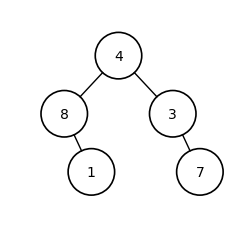

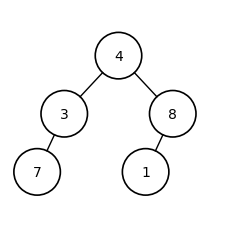

In [ ]:
#@title Test de question 4

un_arbre = ArbreBinaire()
noeud_1 = NoeudBinaire(1)
noeud_8 = NoeudBinaire(8, droite=noeud_1)
noeud_7 = NoeudBinaire(7)
noeud_3 = NoeudBinaire(3, droite=noeud_7)
noeud_4 = NoeudBinaire(4, gauche=noeud_8, droite=noeud_3)
un_arbre.set_racine(noeud_4)
dessiner_arbre(un_arbre)

un_arbre.inverser()
dessiner_arbre(un_arbre)



In [ ]:
def plus_frequent(elements):
    frequences = {}
    for element in elements:
        if element not in frequences:
            frequences[element] = 0
        frequences[element] = frequences[element] + 1

    plus_frequent = None
    nombre = 0
    for element in frequences.keys():
        if frequences[element] > nombre:
            nombre = frequences[element]
            plus_frequent = element
    return plus_frequent

liste = [6, 7, 6, 4, 4, 7, 7, 4, 7, 8, 1, 2, 7, 7, 3, 4]
print(plus_frequent(liste))

# Pour vérifier qu'en cas d'égalité, c'est le premier qui est retourné
liste.extend([6, 6, 6, 6])
print(plus_frequent(liste))
    

7
6
